# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

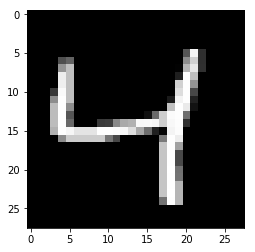

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
image_size = mnist.train.images.shape[1]
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6948
Epoch: 1/20... Training loss: 0.6920
Epoch: 1/20... Training loss: 0.6890
Epoch: 1/20... Training loss: 0.6863
Epoch: 1/20... Training loss: 0.6828
Epoch: 1/20... Training loss: 0.6785
Epoch: 1/20... Training loss: 0.6734
Epoch: 1/20... Training loss: 0.6666
Epoch: 1/20... Training loss: 0.6597
Epoch: 1/20... Training loss: 0.6516
Epoch: 1/20... Training loss: 0.6425
Epoch: 1/20... Training loss: 0.6300
Epoch: 1/20... Training loss: 0.6185
Epoch: 1/20... Training loss: 0.6072
Epoch: 1/20... Training loss: 0.5931
Epoch: 1/20... Training loss: 0.5809
Epoch: 1/20... Training loss: 0.5608
Epoch: 1/20... Training loss: 0.5454
Epoch: 1/20... Training loss: 0.5247
Epoch: 1/20... Training loss: 0.5051
Epoch: 1/20... Training loss: 0.4887
Epoch: 1/20... Training loss: 0.4731
Epoch: 1/20... Training loss: 0.4556
Epoch: 1/20... Training loss: 0.4369
Epoch: 1/20... Training loss: 0.4236
Epoch: 1/20... Training loss: 0.4032
Epoch: 1/20... Training loss: 0.3883
E

Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1828
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1788
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1823
Epoch: 1/20... Training loss: 0.1792
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1803
Epoch: 1/20... Training loss: 0.1781
Epoch: 1/20... Training loss: 0.1750
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1809
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1809
E

Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1536
E

Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1408
E

Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1220
E

Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1109
E

Epoch: 5/20... Training loss: 0.1046
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1107
E

Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1115
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1084
E

Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1073
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0948
E

Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.1015
E

Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.1022
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0901
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0971
E

Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0908
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0960
E

Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0989
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0886
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0887
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0983
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0890
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0883
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.1006
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

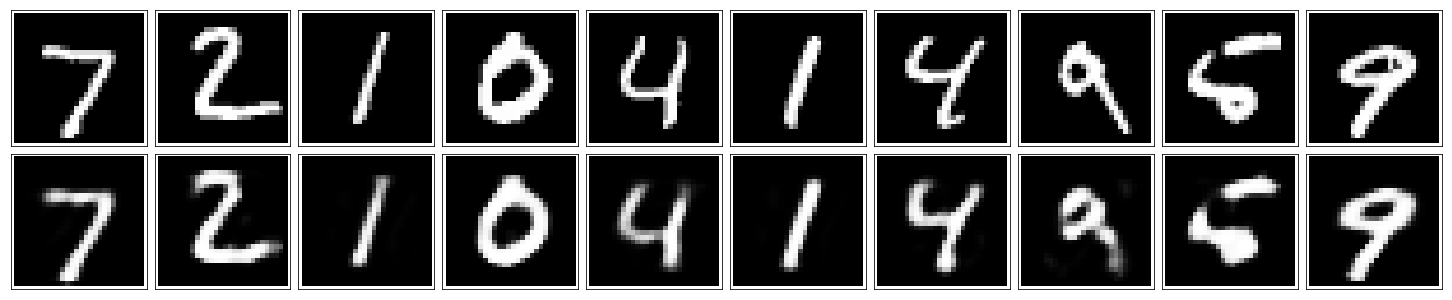

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.